In [22]:
#importing Basic Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [23]:
#Loading the dataset
df_train=pd.read_csv("/content/SMS_train (1).csv",encoding="ISO-8859-1")#here encoding is given for reading the special charecters
df_train

,S. No.,Message_body,Label
0,1,Rofl. Its true to its name,Non-Spam
1,2,The guy did some bitching but I acted like i'd...,Non-Spam
2,3,"Pity, * was in mood for that. So...any other s...",Non-Spam
3,4,Will ü b going to esplanade fr home?,Non-Spam
4,5,This is the 2nd time we have tried 2 contact u...,Spam
...,...,...,...
952,953,hows my favourite person today? r u workin har...,Non-Spam
953,954,How much you got for cleaning,Non-Spam
954,955,Sorry da. I gone mad so many pending works wha...,Non-Spam
955,956,Wat time ü finish?,Non-Spam


In [24]:
df_test=pd.read_csv("/content/SMS_test (2).csv",encoding="ISO-8859-1")
df_test

,S. No.,Message_body,Label
0,1,"UpgrdCentre Orange customer, you may now claim...",Spam
1,2,"Loan for any purpose £500 - £75,000. Homeowner...",Spam
2,3,Congrats! Nokia 3650 video camera phone is you...,Spam
3,4,URGENT! Your Mobile number has been awarded wi...,Spam
4,5,Someone has contacted our dating service and e...,Spam
...,...,...,...
120,121,7 wonders in My WORLD 7th You 6th Ur style 5th...,Non-Spam
121,122,Try to do something dear. You read something f...,Non-Spam
122,123,Sun ah... Thk mayb can if dun have anythin on....,Non-Spam
123,124,"SYMPTOMS when U are in love: ""1.U like listeni...",Non-Spam


In [25]:
#joining the two dataset
df_final=df_train.append(df_test)
df_final

,S. No.,Message_body,Label
0,1,Rofl. Its true to its name,Non-Spam
1,2,The guy did some bitching but I acted like i'd...,Non-Spam
2,3,"Pity, * was in mood for that. So...any other s...",Non-Spam
3,4,Will ü b going to esplanade fr home?,Non-Spam
4,5,This is the 2nd time we have tried 2 contact u...,Spam
...,...,...,...
120,121,7 wonders in My WORLD 7th You 6th Ur style 5th...,Non-Spam
121,122,Try to do something dear. You read something f...,Non-Spam
122,123,Sun ah... Thk mayb can if dun have anythin on....,Non-Spam
123,124,"SYMPTOMS when U are in love: ""1.U like listeni...",Non-Spam


**Feature Engineering**

In [26]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1082 entries, 0 to 124
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   S. No.        1082 non-null   int64 
 1   Message_body  1082 non-null   object
 2   Label         1082 non-null   object
dtypes: int64(1), object(2)
memory usage: 33.8+ KB


In [27]:
df_final.drop('S. No.',axis=1,inplace=True)
df_final

,Message_body,Label
0,Rofl. Its true to its name,Non-Spam
1,The guy did some bitching but I acted like i'd...,Non-Spam
2,"Pity, * was in mood for that. So...any other s...",Non-Spam
3,Will ü b going to esplanade fr home?,Non-Spam
4,This is the 2nd time we have tried 2 contact u...,Spam
...,...,...
120,7 wonders in My WORLD 7th You 6th Ur style 5th...,Non-Spam
121,Try to do something dear. You read something f...,Non-Spam
122,Sun ah... Thk mayb can if dun have anythin on....,Non-Spam
123,"SYMPTOMS when U are in love: ""1.U like listeni...",Non-Spam


In [28]:
df_final['Label'].unique()

array(['Non-Spam', 'Spam'], dtype=object)

In [29]:
df_final['Label'].value_counts()

Non-Spam    884
Spam        198
Name: Label, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


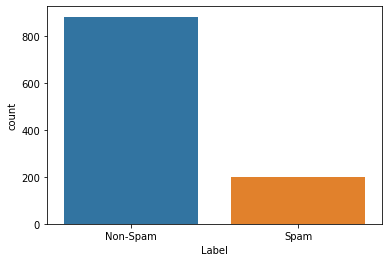

In [30]:
sns.countplot('Label',data=df_final)  

In [31]:
df_final.isna().sum()

Message_body    0
Label           0
dtype: int64

In [32]:
df_final.isna().sum()

Message_body    0
Label           0
dtype: int64

In [33]:
df_final['Label']=df_final['Label'].map({'Non-Spam':1,'Spam':0})
df_final

,Message_body,Label
0,Rofl. Its true to its name,1
1,The guy did some bitching but I acted like i'd...,1
2,"Pity, * was in mood for that. So...any other s...",1
3,Will ü b going to esplanade fr home?,1
4,This is the 2nd time we have tried 2 contact u...,0
...,...,...
120,7 wonders in My WORLD 7th You 6th Ur style 5th...,1
121,Try to do something dear. You read something f...,1
122,Sun ah... Thk mayb can if dun have anythin on....,1
123,"SYMPTOMS when U are in love: ""1.U like listeni...",1


**Preprocessing the data**

In [34]:
#importing necessary nlp libraries
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [35]:
mail=df_final.Message_body
mail

0                             Rofl. Its true to its name
1      The guy did some bitching but I acted like i'd...
2      Pity, * was in mood for that. So...any other s...
3                   Will ü b going to esplanade fr home?
4      This is the 2nd time we have tried 2 contact u...
                             ...                        
120    7 wonders in My WORLD 7th You 6th Ur style 5th...
121    Try to do something dear. You read something f...
122    Sun ah... Thk mayb can if dun have anythin on....
123    SYMPTOMS when U are in love: "1.U like listeni...
124    Great. Have a safe trip. Dont panic surrender ...
Name: Message_body, Length: 1082, dtype: object

In [36]:
from nltk.tokenize import word_tokenize
mail=mail.apply(lambda x:' '.join([w for w in word_tokenize(x)]))
mail

0                            Rofl . Its true to its name
1      The guy did some bitching but I acted like i '...
2      Pity , * was in mood for that . So ... any oth...
3                  Will ü b going to esplanade fr home ?
4      This is the 2nd time we have tried 2 contact u...
                             ...                        
120    7 wonders in My WORLD 7th You 6th Ur style 5th...
121    Try to do something dear . You read something ...
122    Sun ah ... Thk mayb can if dun have anythin on...
123    SYMPTOMS when U are in love : `` 1.U like list...
124    Great . Have a safe trip . Dont panic surrende...
Name: Message_body, Length: 1082, dtype: object

In [37]:
mail=mail.str.replace('[^a-zA-Z0-9]+',' ')
mail

<ipython-input-37-673e710d9540>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  mail=mail.str.replace('[^a-zA-Z0-9]+',' ')


0                              Rofl Its true to its name
1      The guy did some bitching but I acted like i d...
2      Pity was in mood for that So any other suggest...
3                     Will b going to esplanade fr home 
4      This is the 2nd time we have tried 2 contact u...
                             ...                        
120    7 wonders in My WORLD 7th You 6th Ur style 5th...
121    Try to do something dear You read something fo...
122    Sun ah Thk mayb can if dun have anythin on Thk...
123    SYMPTOMS when U are in love 1 U like listening...
124     Great Have a safe trip Dont panic surrender all 
Name: Message_body, Length: 1082, dtype: object

In [38]:
#Tokenisation
from nltk.tokenize import word_tokenize
mail=mail.apply(lambda x:" ".join([w for w in word_tokenize(x) if len(w)>=3]))
mail

0                                 Rofl Its true its name
1      The guy did some bitching but acted like inter...
2           Pity was mood for that any other suggestions
3                              Will going esplanade home
4      This the 2nd time have tried contact have won ...
                             ...                        
120    wonders WORLD 7th You 6th style 5th smile 4th ...
121      Try something dear You read something for exams
122    Sun Thk mayb can dun have anythin Thk have boo...
123    SYMPTOMS when are love like listening songs ge...
124        Great Have safe trip Dont panic surrender all
Name: Message_body, Length: 1082, dtype: object

In [39]:
#Stemming
from nltk.stem import SnowballStemmer
ss=SnowballStemmer('english')
mail=mail.apply(lambda x:[ss.stem(i.lower()) for i in word_tokenize(x)]).apply(lambda x:" ".join(x))
mail

0                                   rofl it true it name
1      the guy did some bitch but act like interest b...
2               piti was mood for that ani other suggest
3                                  will go esplanad home
4      this the 2nd time have tri contact have won th...
                             ...                        
120    wonder world 7th you 6th style 5th smile 4th p...
121             tri someth dear you read someth for exam
122    sun thk mayb can dun have anythin thk have boo...
123    symptom when are love like listen song get sto...
124          great have safe trip dont panic surrend all
Name: Message_body, Length: 1082, dtype: object

In [40]:
#Removing Stopwords
from nltk.corpus import stopwords
data_words=stopwords.words('english')
mail=mail.apply(lambda x:[i for i in word_tokenize(x) if not i in data_words]).apply(lambda x:" ".join(x))
mail

0                                         rofl true name
1      guy bitch act like interest buy someth els nex...
2                                  piti mood ani suggest
3                                       go esplanad home
4      2nd time tri contact 750 pound prize claim eas...
                             ...                        
120    wonder world 7th 6th style 5th smile 4th perso...
121                     tri someth dear read someth exam
122    sun thk mayb dun anythin thk book lesson pilat...
123    symptom love like listen song get stop see nam...
124                   great safe trip dont panic surrend
Name: Message_body, Length: 1082, dtype: object

In [41]:
#Vectorization
from sklearn.feature_extraction.text import TfidfVectorizer
vec=TfidfVectorizer()
train=vec.fit_transform(mail)
print(train)

  (0, 1750)	0.5086856793431559
  (0, 2613)	0.5352804139572925
  (0, 2153)	0.6743246681420617
  (1, 1117)	0.1977601804079742
  (1, 1162)	0.32809784984076795
  (1, 2750)	0.22799692523276513
  (1, 1782)	0.26514476216742267
  (1, 966)	0.30392006451010634
  (1, 2339)	0.2751324774651613
  (1, 617)	0.2751324774651613
  (1, 1389)	0.3187189191538061
  (1, 1531)	0.2174075457753962
  (1, 332)	0.35437558793533497
  (1, 542)	0.3752334020731641
  (1, 1233)	0.26826339572857744
  (2, 2438)	0.5165656915002457
  (2, 401)	0.36716239650585775
  (2, 1707)	0.5469696796701571
  (2, 1933)	0.5469696796701571
  (3, 1306)	0.47434824349351795
  (3, 993)	0.7276196298199475
  (3, 1189)	0.4955435583228748
  (4, 2067)	0.235533135363796
  (4, 1759)	0.2730067862368853
  (4, 1673)	0.2433372454072742
  :	:
  (1079, 1856)	0.2706898396742334
  (1079, 1723)	0.2706898396742334
  (1079, 2444)	0.26153957460502464
  (1079, 1520)	0.24774213284441401
  (1079, 563)	0.2374366876682329
  (1079, 2534)	0.49548426568882803
  (1079, 164

In [43]:
y=df_final['Label'].values
y

array([1, 1, 1, ..., 1, 1, 1])

**Model Creation**

In [44]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(train,y,test_size=0.3,random_state=42)
xtrain

<757x2863 sparse matrix of type '<class 'numpy.float64'>'
	with 6291 stored elements in Compressed Sparse Row format>

In [45]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
models=[SVC(),KNeighborsClassifier(n_neighbors=5),MultinomialNB(),RandomForestClassifier(),DecisionTreeClassifier()]
for model in models:
  model.fit(xtrain,ytrain)
  ypred=model.predict(xtest)
  score=accuracy_score(ytest,ypred)*100
  print("{}: {}".format(model,score),end="\n\n")

SVC(): 92.61538461538461

KNeighborsClassifier(): 84.3076923076923

MultinomialNB(): 93.53846153846153

RandomForestClassifier(): 94.76923076923077

DecisionTreeClassifier(): 94.15384615384616



Observation: RandomForestClassifier have high efficiency when compared to other algorithms

In [47]:
model=RandomForestClassifier()
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       1.00      0.79      0.88        56
           1       0.96      1.00      0.98       269

    accuracy                           0.96       325
   macro avg       0.98      0.89      0.93       325
weighted avg       0.96      0.96      0.96       325



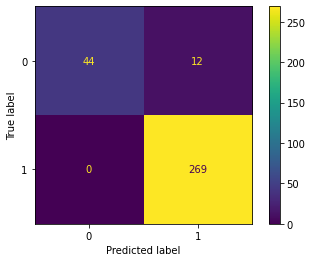

In [48]:
label=['0','1']
result=confusion_matrix(ytest,ypred)
cmd=ConfusionMatrixDisplay(result,display_labels=label)
cmd.plot()